****************
# <font color = 'purple'> <p style='text-align: center;'> LEAD SCORING CASE STUDY </p>

### <font color = 'purple'> <p style='text-align: center;'> By - Nitanshu Joshi & Anshika Dua</p>
*************************

### <font color='red'> Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


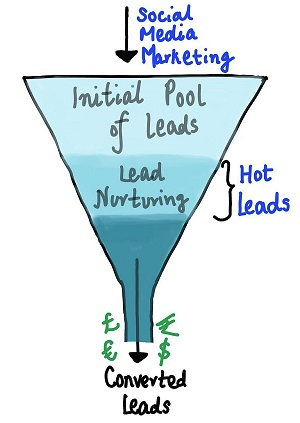

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


### <font color='red'>  Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).
 
### <font color='red'> Goals of the Case Study
There are quite a few goals for this case study.
1.	Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2.	There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 
   
*******************************************
*******************************************

### <font color = 'red'> Data Dictionary
| Variables |	Description |
| :- | :------------- |
| Prospect ID | A unique ID with which the customer is identified.|
| Lead Number | A lead number assigned to each lead procured.|
|Lead Origin | The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.|
|Lead Source | The source of the lead. Includes Google, Organic Search, Olark Chat, etc. |
|Do Not Email | An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.|
| Do Not Call |	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.|
| Converted |	The target variable. Indicates whether a lead has been successfully converted or not.|
| TotalVisits | The total number of visits made by the customer on the website.|
| Total Time Spent on Website |	The total time spent by the customer on the website.|
| Page Views Per Visit | Average number of pages on the website viewed during the visits.|
| Last Activity | Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.|
| Country | The country of the customer.|
| Specialization | The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form. |
| How did you hear about X Education | The source from which the customer heard about X Education.|
| What is your current occupation | Indicates whether the customer is a student, umemployed or employed.|
| What matters most to you in choosing this course | An option selected by the customer indicating what is their main motto behind doing this course.|
| Search | Indicating whether the customer had seen the ad in any of the listed items.|
| Magazine |Indicating whether the customer had seen the ad in any of the listed items.|
| Newspaper Article	| Indicating whether the customer had seen the ad in any of the listed items.|
|X Education Forums	| Indicating whether the customer had seen the ad in any of the listed items.|
| Newspaper	| Indicating whether the customer had seen the ad in any of the listed items.|
| Digital Advertisement	|Indicating whether the customer had seen the ad in any of the listed items.|
| Through Recommendations | Indicates whether the customer came in through recommendations.|
| Receive More Updates About Our Courses | Indicates whether the customer chose to receive more updates about the courses.|
| Tags | Tags assigned to customers indicating the current status of the lead.|
| Lead Quality	| Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. |
|Update me on Supply Chain Content | Indicates whether the customer wants updates on the Supply Chain Content.|
| Get updates on DM Content | Indicates whether the customer wants updates on the DM Content.|
|Lead Profile | A lead level assigned to each customer based on their profile.|
|City | The city of the customer.|
|Asymmetrique Activity Index|An index and score assigned to each customer based on their activity and their profile|
|Asymmetrique Profile Index	|An index and score assigned to each customer based on their activity and their profile|
|Asymmetrique Activity Score|An index and score assigned to each customer based on their activity and their profile|
|Asymmetrique Profile Score|An index and score assigned to each customer based on their activity and their profile|
|I agree to pay the amount through cheque | Indicates whether the customer has agreed to pay the amount through cheque or not.|
| a free copy of Mastering The Interview | Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.|
|Last Notable Activity | The last notable acitivity performed by the student.|


In [1]:
# Imports and Warnings
# ====================

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

# To Scale our data
# from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

# importing logistic regression and RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Importing precision-recall curve
from sklearn.metrics import precision_recall_curve

In [2]:
# Displaying the Maximum Rows and Columns
# ---------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Setting float to the second decimal spot
# ----------------------------------------
pd.options.display.float_format = '{:.2f}'.format

**************
## <font color='blue'> Step 1 - Reading and Understanding the Data
**************

In [3]:
# Reading the Data
# ----------------
df = pd.read_csv('Leads.csv')

In [4]:
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.shape

(9240, 37)

In [7]:
# We observe that most of the columns are of string type, while others were numerical
# Also there a huge number of rows = 9240 and huge number of columns = 37.

********************
##  <font color='blue'> Step 2 - Exploratory Data Analysis (EDA)
********************

### <font color='magenta'>2.1) - Data Cleaning

#### <font color = 'maroon'> 2.1.1) - Types of Data in the dataset

There are two types of columns in the dataset - 
- Source Columns: Theses is the data given directly by the customers.
- Sales Team Generated colums: These data are generated by the sales team.

We need to drop the Sales Team Generated Columns.
They include - 
- Tags
- Lead Quality
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score 
- Asymmetrique Profile Score 
- Last Notable Activity
- Lead Quality

In [8]:
df1 = df.drop(['Tags',
                'Lead Quality',
                'Asymmetrique Activity Index',
                'Asymmetrique Profile Index',
                'Asymmetrique Activity Score',
                'Asymmetrique Profile Score',
                'Last Notable Activity',
                'Lead Quality'], axis=1)

#### <font color = 'maroon'> 2.1.2) - Dropping Un-Required Columns

We see that our analysis will not require columns like - 

- 'Prospect ID'
- 'Lead Number'

Thus we will need to drop them.

In [9]:
df2 = df1.drop(['Lead Number', 'Prospect ID'],axis=1)

#### <font color = 'maroon'> 2.1.3) - DEALING WITH NULL VALUES

In [10]:
# Before dealing with Null values, we observe that some columns have values in its cells as - 'Select'.
# This represents a Null value.
# Thus we first need to convert this 'Select' value into NaN value, so that it can be identified.
df2 = df2.replace('Select', np.nan)

In [11]:
# Function for Checking NULL Counts and NULL Percentages
# ======================================================
def check_null(df):
    null_val = pd.DataFrame()
    
    Null_Count = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), 
                              columns=['Null_Count'])
    
    Null_Percentage = pd.DataFrame(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending=False),
                                   columns=['Null_Percentage'])
    
    return pd.concat([Null_Count, Null_Percentage], axis = 1)

In [12]:
# Checking for Percentage of Null values in the Data
# --------------------------------------------------
check_null(df2)

,Null_Count,Null_Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
City,3669,39.71
Specialization,3380,36.58
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11


In [13]:
# We observe that there are various columns which have a high number of NULL values.

In [14]:
# We will start by removing columns that have more than 30% Null values
# ---------------------------------------------------------------------
df3 = df2.drop(['How did you hear about X Education', 
               'Lead Profile',               
               'City',
               'Specialization'], 
              axis=1)
df3.shape

(9240, 24)

In [15]:
# Re-Checking for Null Values
# ---------------------------
check_null(df3)

,Null_Count,Null_Percentage
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
I agree to pay the amount through cheque,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00


In [16]:
# Now we will look at each column with NULL value and deal with them individually

In [17]:
# (1) - 'What matters most to you in choosing a course'
# -----------------------------------------------------
print(df3['What matters most to you in choosing a course'].value_counts())

# (2) - 'What is your current occupation'
# ---------------------------------------
print()
print(df3['What is your current occupation'].value_counts())

# (3) - 'Country'
# ---------------
print()
print(df3['Country'].value_counts())
print()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
Philippines             

In [18]:
# When we look at the 'What matters most to you in choosing a course' column
#   We see that most of values in it are - 'Better Career Prospects'.

# When we look at the 'What is your current occupation' column
#   We see that most of values in it are - 'Unemployed'

# When we look at the 'Country' column
#   We see that most of values in it are - 'India'

# ---------------------------------------------------------------------
# These are some skewed-categorical columns, so we need to remove them.
# ---------------------------------------------------------------------

In [19]:
df4 = df3.drop(['What is your current occupation',
                'Country',
                'What matters most to you in choosing a course'], axis=1)
df4.shape

(9240, 21)

In [20]:
# Re-Checking for Null Values
# ---------------------------
check_null(df4)

,Null_Count,Null_Percentage
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
A free copy of Mastering The Interview,0,0.00
Search,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
Total Time Spent on Website,0,0.00


In [21]:
# For the Remaining Null values, since the number is less, we can remove the Rows with NULL values

In [22]:
df5 = df4.dropna(axis=0)

In [23]:
check_null(df5)

,Null_Count,Null_Percentage
A free copy of Mastering The Interview,0,0.00
Search,0,0.00
Lead Source,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00
TotalVisits,0,0.00
Total Time Spent on Website,0,0.00
Page Views Per Visit,0,0.00
Last Activity,0,0.00


In [24]:
df5.shape

(9074, 21)

*******************
### <font color='magenta'>2.2) - Data Visualization
*******************

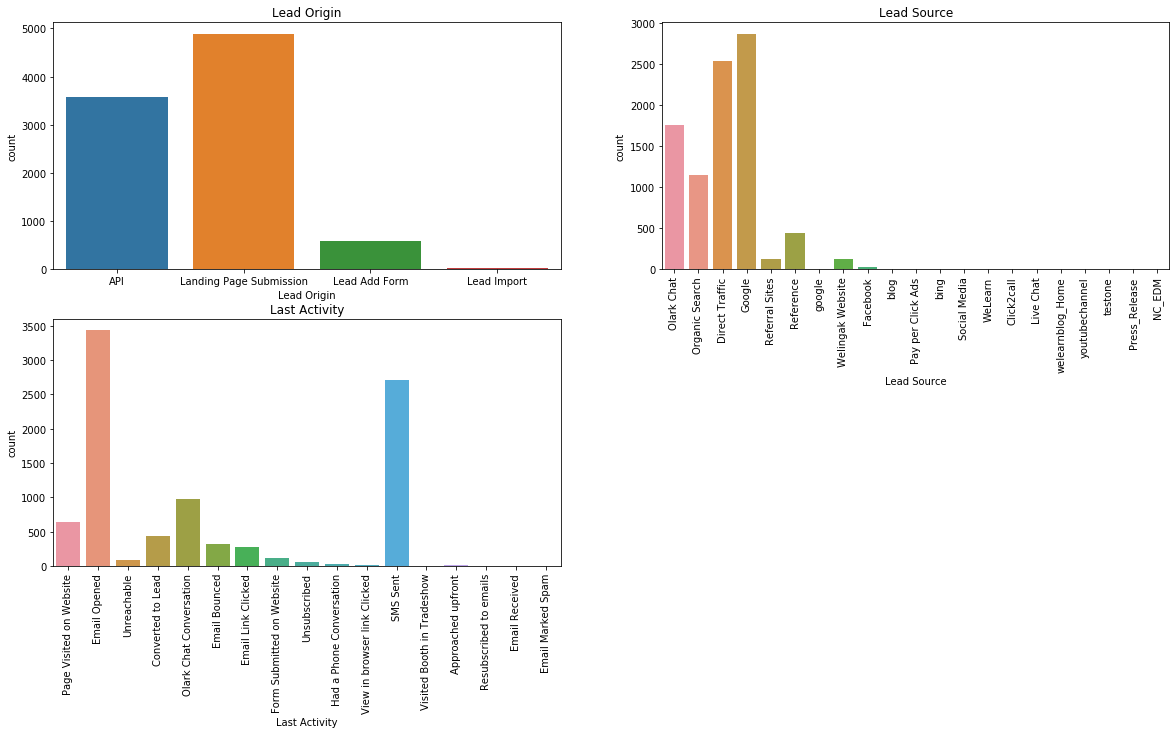

In [25]:
# Plotting the Barplot/Countplot for various multi-level categorical column
# -------------------------------------------------------------------------

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.countplot(df5['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(df5['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(2,2,3)
sns.countplot(df5['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

In [26]:
# Observations and Inferences
# ---------------------------
# We observe that there most if origin of the leads are from 'Landing Page Submission',
#    while the least is from 'Lead Import'
# 
# We also observe that most of the lead sources are from 'Google' followed by 'Direct Traffic', 
#    whereas 'Referral Sites' have the least.
#
# We also see that people who opened their email are highly seen by the company as a possible lead.

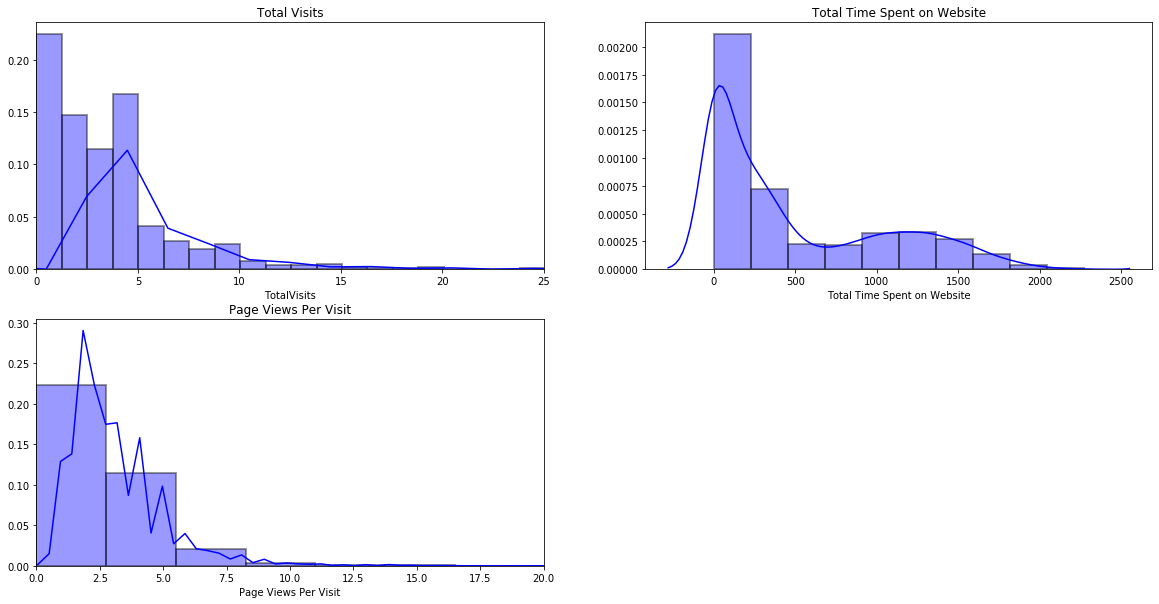

In [27]:
# Plotting Histogram for Continuous variables
# -------------------------------------------

plt.figure(figsize = (20,10))
plt.subplot(221)
sns.distplot(df5['TotalVisits'], bins = 200, color='blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.distplot(df5['Total Time Spent on Website'], bins = 10, color='blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.distplot(df5['Page Views Per Visit'], bins = 20, color='blue',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

In [28]:
# Observations and Inferences
# ---------------------------
# We observe that the average number of total visits by a customer on the website is on the lower end.
# We also observe that average total time spent on the website by customes is also less.
# We also observe that the average number of page view for the website on one visit is very less.

*******************
### <font color='magenta'>2.3) - Outlier Analysis
*******************

In [29]:
# Looking at the desciption of Data
# ---------------------------------
round(df5.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00,9074.00
mean,0.38,3.46,482.89,2.37
std,0.49,4.86,545.26,2.16
min,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00
35%,0.00,2.00,96.00,1.50
50%,0.00,3.00,246.00,2.00
55%,0.00,3.00,301.00,2.00
75%,1.00,5.00,922.75,3.20
95%,1.00,10.00,1557.00,6.00


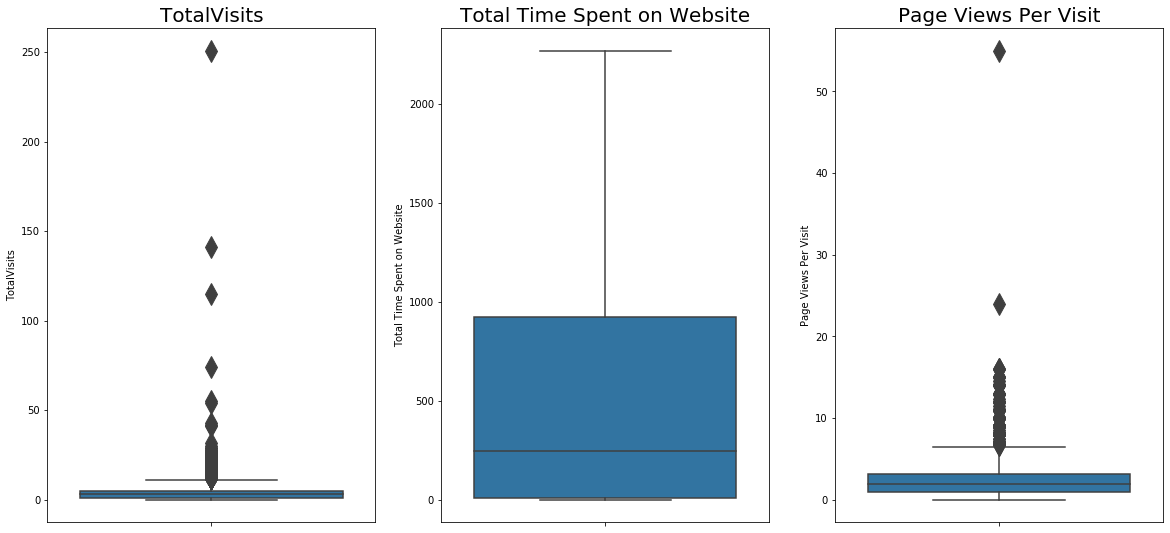

In [30]:
# Making Boxplot to visualize the Continuous columns
# --------------------------------------------------

plt.figure(figsize=(20,20))

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

for i in range(3):
    plt.subplot(2,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=df5[col[i]],data=df5,orient='v',fliersize=15) 

In [31]:
# Observations
# ------------
# Clearly, we can see there are outliers in the columns `Page Views Per Visit` and `TotalVisits`, 
#  so we will create bins in these columns.

In [32]:
# Creating Bins for the columns - 'Page Views Per Visit' and 'TotalVisits'
# ------------------------------------------------------------------------
ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}


for i in range(len(list(ranges_total_visits.keys()))):
    df5[list(ranges_total_visits.keys())[i]]=df5['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

    
    
    
ranges_page_visits={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

for i in range(len(list(ranges_page_visits.keys()))):
    df5[list(ranges_page_visits.keys())[i]]=df5['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_page_visits.values())[i] and x >= (list(ranges_page_visits.values())[i] - 10)) else 0)
    
    

In [33]:
# Dropping the columns `Page Views Per Visit` and `TotalVisits`, 
# since we have made bins for these variables

cols = ['TotalVisits','Page Views Per Visit']
df5 = df5.drop(cols,axis=1)
df5.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,API,Olark Chat,No,No,0,0,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,No,No,0,674,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,1532,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,1,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,305,Unreachable,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,1428,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0


********************
##  <font color='blue'> Step 3 - Preparing the Data for Modelling
********************

### <font color='magenta'>3.1) - Decreasing the Number of Labels from Non-Binary Categorical Variables

When we look at the non-binary categorical variables, we find that there are a lot of labels associated with some categorical variables. If we could somehow reduce some of the labels/categories from these columns, there would be very less number of dummy variables, which would simplify our model.

This can be done only on columns that are ***skewed-categorical columns***.
*************

In [34]:
# Model Preparation
df5.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,API,Olark Chat,No,No,0,0,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,No,No,0,674,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,1532,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,1,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,305,Unreachable,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,1428,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
5,API,Olark Chat,No,No,0,0,Olark Chat Conversation,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
6,Landing Page Submission,Google,No,No,1,1640,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
7,API,Olark Chat,No,No,0,0,Olark Chat Conversation,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0
8,Landing Page Submission,Direct Traffic,No,No,0,71,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,1,0,0,0,0,0,1,0,0,0,0,0
9,API,Google,No,No,0,58,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,1,0,0,0,0,0,1,0,0,0,0,0


****************
Looking at the dataset there are 3 non-binary categorical columns - 
- Lead Origin
- Lead Source
- Last Activity
****************

In [35]:
# Looking at there value counts of the Labels
# -------------------------------------------
print("------------------------------------------------")
# For Lead Origin Column
print("FOR Lead Origin Column - \n")
print(df5['Lead Origin'].value_counts())
print("------------------------------------------------")
# For Lead Source Column
print("FOR Lead Source Column - \n")
print(df5['Lead Source'].value_counts())
print("------------------------------------------------")
# For Last Activity Column
print("FOR Last Activity Column - \n")
print(df5['Last Activity'].value_counts())
print("------------------------------------------------")

------------------------------------------------
FOR Lead Origin Column - 

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
------------------------------------------------
FOR Lead Source Column - 

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
blog                    1
WeLearn                 1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64
------------------------------------------------
FOR Last Activity Column - 

Email Opened                    

********************
For the **'Lead Origin'** column - We see that no conversion is required.<br><br>

For the **'Lead Source'** column - We see that we can make the following changes:
- We see that there is a repitition of Google and google. We will merege these cell values.
- Also there various labels with very low counts, thus we can convert them to 'Other Lead Sources'. All those column labels with 100 or less values could be converted to 'Other Lead Sources'.<br><br>

For the **'Last Activity'** column - We can observe and make the following changes:
- We see that there are various labels with very low counts, thus we can convert them to 'Other Activities'. All those column labels with 100 or less values could be converted to 'Other Activities'.


In [36]:
# Making changes for the Lead Source Column:
# =========================================

In [37]:
# Removing the repitition of Google and google. 
# We will merge these cell values

df5['Lead Source'] = df5['Lead Source'].replace(['google'], 'Google')
df5['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
blog                    1
WeLearn                 1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

In [38]:
# We see that the 'Google' cells have been merged.

In [39]:
def lead_source_conversion(x):
    
    if x=='Google':
        return 'Google'
    elif x=='Direct Traffic':
        return 'Direct Traffic'
    elif x=='Olark Chat':
        return 'Olark Chat'
    elif x=='Organic Search':
        return 'Organic Search'
    elif x=='Reference':
        return 'Reference'
    elif x=='Welingak Website':
        return 'Welingak Website'
    elif x=='Referral Sites':
        return 'Referral Sites'
    else:
        return 'Other Lead Sources'

df5['Lead Source'] = df5['Lead Source'].apply(lead_source_conversion)
df5['Lead Source'].value_counts()

Google                2873
Direct Traffic        2543
Olark Chat            1753
Organic Search        1154
Reference              443
Welingak Website       129
Referral Sites         125
Other Lead Sources      54
Name: Lead Source, dtype: int64

In [40]:
# We have changed all the Lead Source categories which have count less than 100
# to 'Other Lead Sources' successfully

In [41]:
# Making changes for the Last Activity Column:
# ===========================================
df5['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [42]:
def last_activity_conversions(x):
    if x=='Email Opened':
        return 'Email Opened'
    elif x=='SMS Sent':
        return 'SMS Sent'
    elif x=='Olark Chat Conversation':
        return 'Olark Chat Conversation'
    elif x=='Page Visited on Website':
        return 'Page Visited on Website'
    elif x=='Converted to Lead':
        return 'Converted to Lead'
    elif x=='Email Bounced':
        return 'Email Bounced'
    elif x=='Email Link Clicked':
        return 'Email Link Clicked'
    elif x=='Form Submitted on Website':
        return 'Form Submitted on Website'
    else:
        return 'Other Activities'
    
df5['Last Activity'] = df5['Last Activity'].apply(last_activity_conversions)
df5['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Other Activities              191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [43]:
# We have changed all the 'Last Activity' categories which have count less than 100
# to 'Other Activities' successfully

********************
### <font color='magenta'>3.2) - Converting the column into the required data type

In [44]:
# Converting the values of Binary-Categorical variables into 0s and 1s :
# ====================================================================

# Making a list of Binary-Categorical Variables
# ---------------------------------------------
binary_categorical_variables = ['Do Not Email',
                                'Do Not Call',
                                'Search',
                                'Magazine',
                                'Newspaper Article',
                                'X Education Forums',
                                'Newspaper',
                                'Digital Advertisement',
                                'Through Recommendations',
                                'Receive More Updates About Our Courses',
                                'Update me on Supply Chain Content',
                                'Get updates on DM Content',
                                'I agree to pay the amount through cheque',
                                'A free copy of Mastering The Interview']

# Defining the map function
# -------------------------
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
# -----------------------------------------
df5[binary_categorical_variables] = df5[binary_categorical_variables].apply(binary_map)

In [45]:
# Changing the Name of the dataframe to a much more readable dataset
lead_scoring = df5.copy()
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,API,Olark Chat,0,0,0,0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,0,674,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,305,Other Activities,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [46]:
lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Lead Origin                               9074 non-null   object
 1   Lead Source                               9074 non-null   object
 2   Do Not Email                              9074 non-null   int64 
 3   Do Not Call                               9074 non-null   int64 
 4   Converted                                 9074 non-null   int64 
 5   Total Time Spent on Website               9074 non-null   int64 
 6   Last Activity                             9074 non-null   object
 7   Search                                    9074 non-null   int64 
 8   Magazine                                  9074 non-null   int64 
 9   Newspaper Article                         9074 non-null   int64 
 10  X Education Forums                        9074 n

******************
### <font color='magenta'>3.3) - Creating Dummy Variables

We see that only 3 categorical variables require dummy variables to be formed - 
- Lead Origin
- Lead Source
- Last Activity

In [47]:
dummy_variables = pd.get_dummies(lead_scoring[['Lead Source', 'Lead Origin', 'Last Activity']], drop_first=True)
dummy_variables.head()

,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
lead_scoring = pd.concat([lead_scoring, dummy_variables], axis=1)
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,API,Olark Chat,0,0,0,0,Page Visited on Website,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,0,674,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,1532,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,305,Other Activities,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,0,1,1428,Converted to Lead,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
# Dropping the Repaired Variables
# ===============================

# We have created dummies for the below variables, so we can drop them
# --------------------------------------------------------------------

lead_scoring = lead_scoring.drop(['Lead Source', 'Lead Origin', 'Last Activity'], axis=1)

In [50]:
lead_scoring.head(5)

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1428,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


******************
### <font color='magenta'>3.4) - Train-Test Split

In [51]:
# Putting independent variable to X
X = lead_scoring.drop('Converted', axis=1)

# Putting response variable to y
y = lead_scoring['Converted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

******************
### <font color='magenta'>3.5) - Re-Scaling using Standard Scalar

In [52]:
# Initializing the Standard Scalar Object
scaler = StandardScaler()

In [53]:
# lead_scoring.info()

In [54]:
# We will fit and transform the continuous columns for the X-training variable
# We have only 1 continnuous variables - 
# - 'Total Time Spent on Website',
# ----------------------------------------------------------------------------

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent
3009,0,0,-0.16,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1012,1,0,-0.54,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
9226,0,0,-0.89,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4750,0,0,1.64,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7987,0,0,2.02,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


******************
### <font color='magenta'>3.6) - Checking for Lead Conversion Rate and Class Imbalance

Checking the lead-conversion rate is important since you usually want your data to have a balance between the 0s and 1s (in this case lead-conversion or non-lead-conversion).

In [55]:
lead_conversion_rate = (sum(lead_scoring['Converted'])/len(lead_scoring['Converted'].index))*100
print(lead_conversion_rate)

37.85541106458012


Fortunately, in this case, we have about **38% lead conversion rate**. 
This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. 
<br>**So we'll not have to do any special treatment for this dataset.**

******************
### <font color='magenta'>3.7) - Looking at Correlations

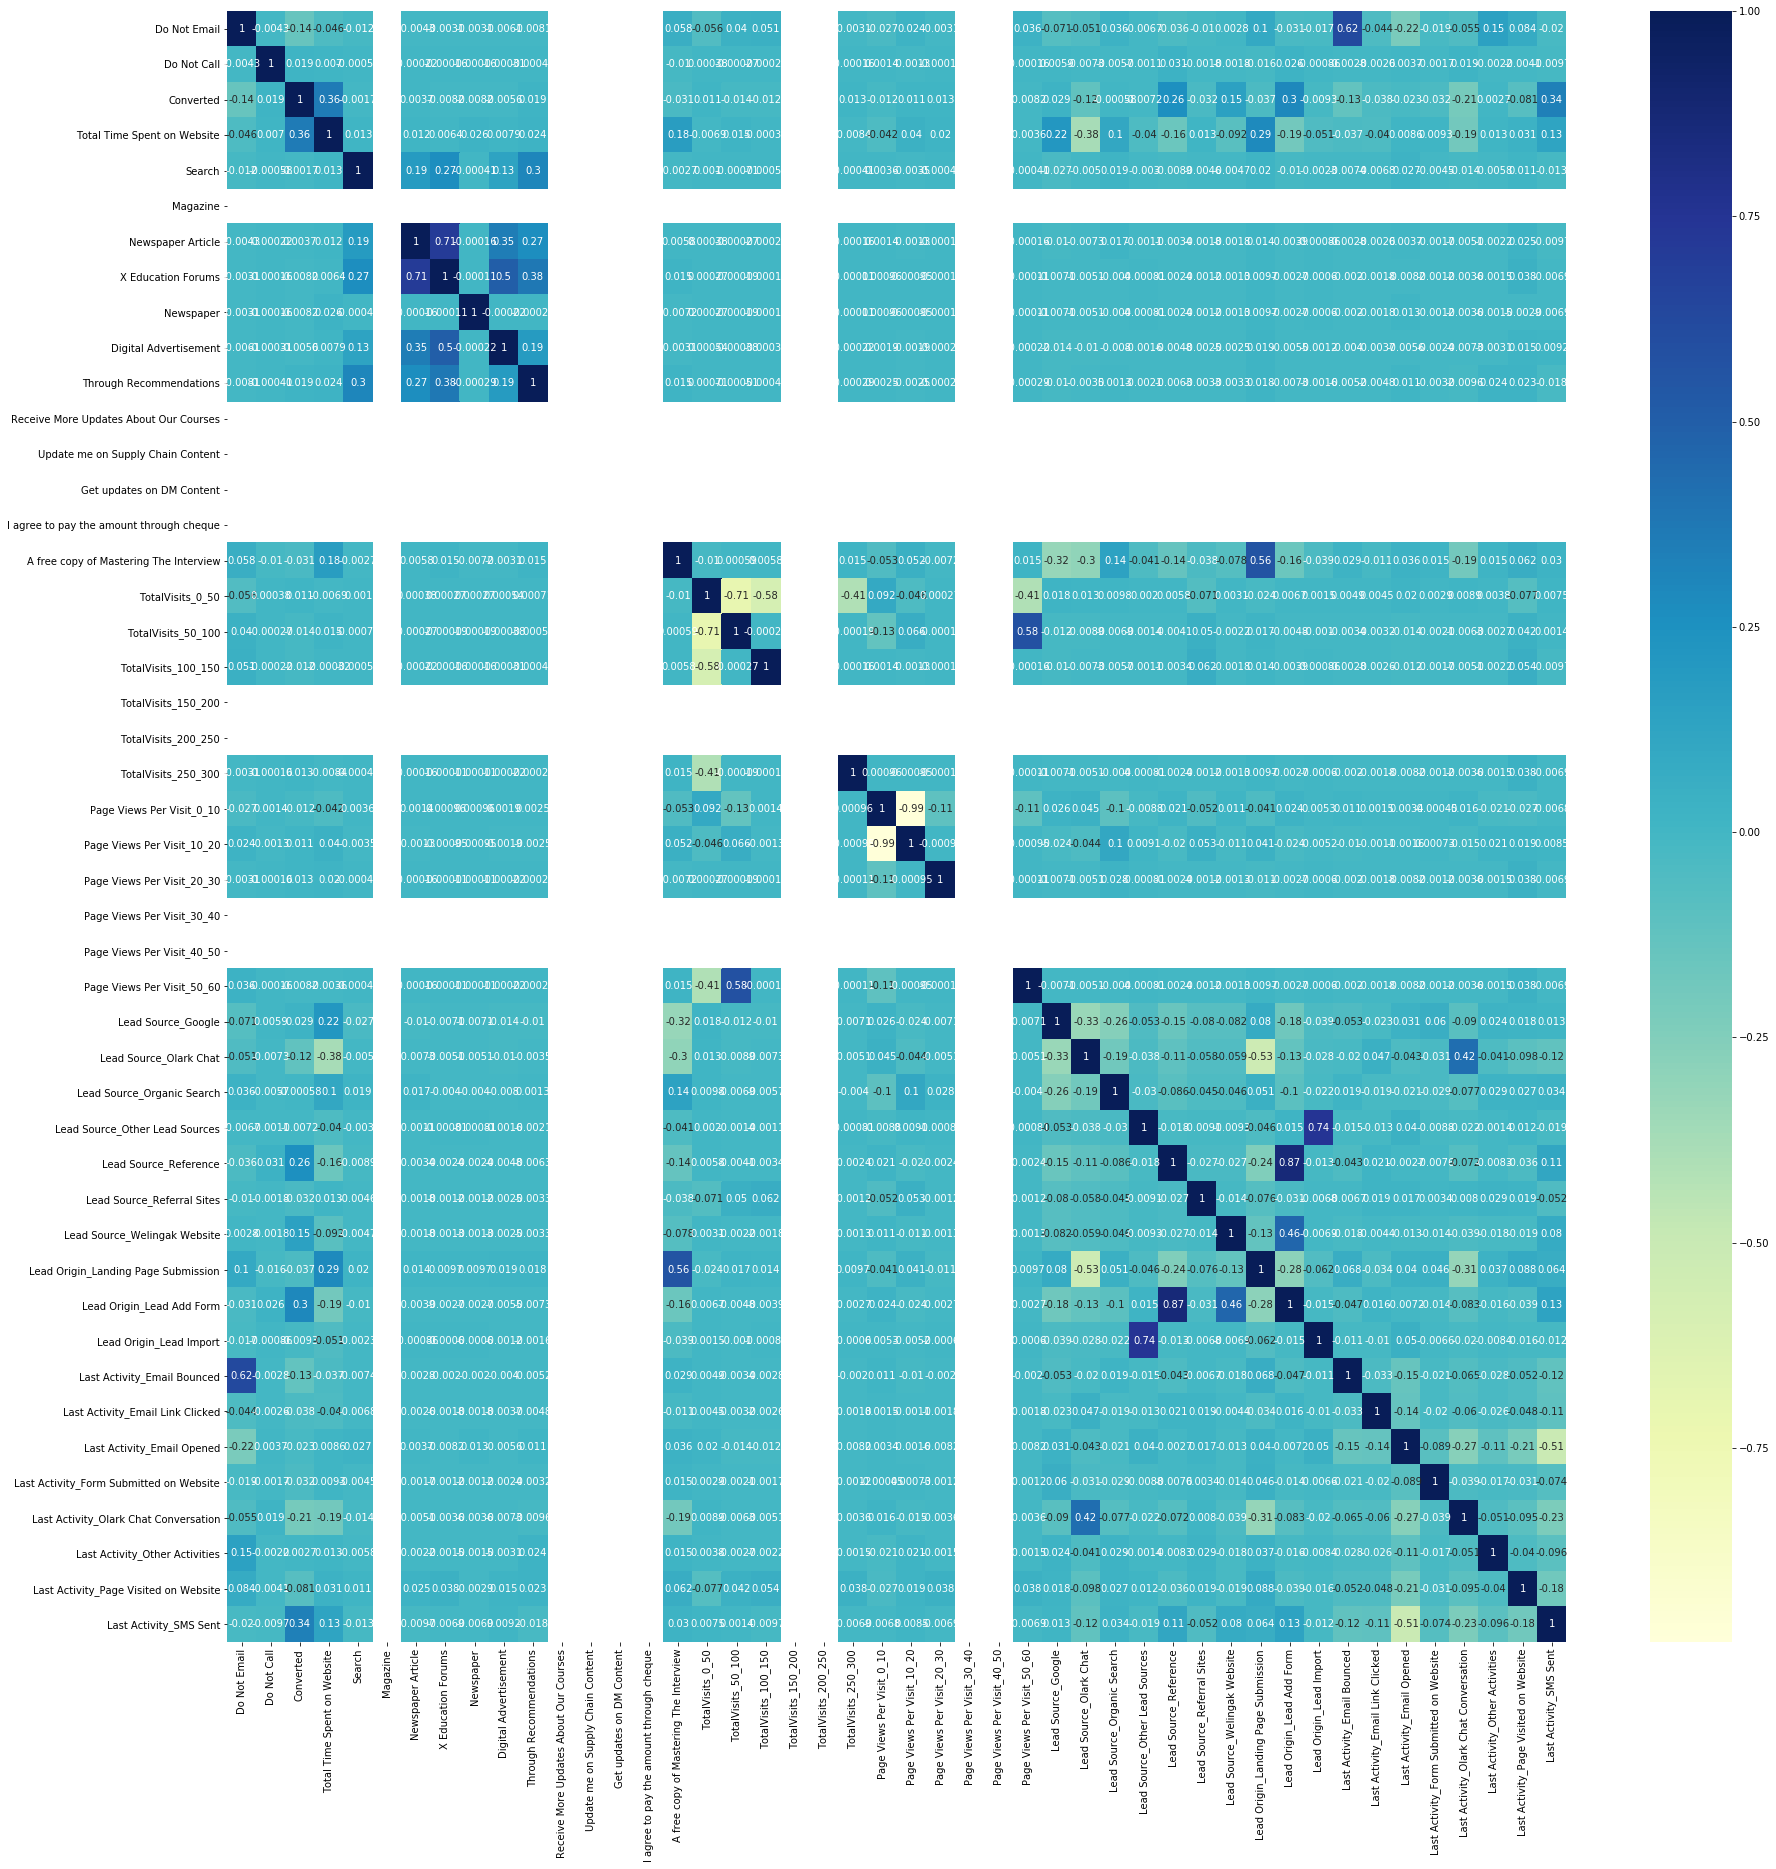

In [56]:
plt.figure(figsize = (30,30))
sns.heatmap(lead_scoring.corr(method='pearson'), annot=True, cmap='YlGnBu')
plt.show()

**************
We observe that quite a few variables have a high correlation between themselves.
<br><br>
We observe that there are a lot of variables present in the dataframe, and it will be very difficult to drop these variables. Thus we will minimize the variables using the RFE (Recursive feature elimination) process.

********************
##  <font color='blue'> Step 4 - Recursive Feature Elminiation and Model Building
********************

In [57]:
# creating logistic regression object
logreg = LogisticRegression()

**************
### <font color='magenta'>4.1) - Running Recursive Feature Elimination with 15 variables as Output

In [58]:
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [59]:
print(rfe.support_)

[ True False  True False False False False  True False False False False
 False False False  True False False False False  True  True False False
 False False False False  True False False  True False  True False  True
  True False False  True False  True  True False  True]


In [60]:
# Printing the list of variables with their RFE rankings
# ------------------------------------------------------
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 20),
 ('Magazine', False, 22),
 ('Newspaper Article', False, 12),
 ('X Education Forums', False, 6),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 11),
 ('Through Recommendations', False, 5),
 ('Receive More Updates About Our Courses', False, 26),
 ('Update me on Supply Chain Content', False, 28),
 ('Get updates on DM Content', False, 23),
 ('I agree to pay the amount through cheque', False, 29),
 ('A free copy of Mastering The Interview', False, 19),
 ('TotalVisits_0_50', True, 1),
 ('TotalVisits_50_100', False, 30),
 ('TotalVisits_100_150', False, 16),
 ('TotalVisits_150_200', False, 21),
 ('TotalVisits_200_250', False, 31),
 ('TotalVisits_250_300', True, 1),
 ('Page Views Per Visit_0_10', True, 1),
 ('Page Views Per Visit_10_20', False, 13),
 ('Page Views Per Visit_20_30', False, 10),
 ('Page Views Per Visit_30_40', False, 27),
 ('Page Views Per Visit_40

In [61]:
# Assigning the 15 RFE selected columns to a list
# -----------------------------------------------
RFE_selected_columns = X_train.columns[rfe.support_]
RFE_selected_columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'TotalVisits_0_50', 'TotalVisits_250_300', 'Page Views Per Visit_0_10',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activities', 'Last Activity_SMS Sent'],
      dtype='object')

In [62]:
# Selecting columns selected by RFE
# ----------------------------------
X_train = X_train[RFE_selected_columns]

In [63]:
X_train.head()

,Do Not Email,Total Time Spent on Website,Newspaper,TotalVisits_0_50,TotalVisits_250_300,Page Views Per Visit_0_10,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_SMS Sent
3009,0,-0.16,0,1,0,1,0,0,0,0,0,1,0,0,0
1012,1,-0.54,0,1,0,1,0,0,0,0,0,0,0,0,0
9226,0,-0.89,0,1,0,1,1,0,0,0,0,0,0,0,1
4750,0,1.64,0,1,0,1,0,0,0,0,0,0,0,0,1
7987,0,2.02,0,1,0,1,0,0,0,0,0,0,0,0,1


**************
### <font color='magenta'>4.2) - Building the Logistic Regression Model

In [64]:
# Building Model 1 using Stats Mode
# ---------------------------------
X_train_sm = sm.add_constant(X_train)
log_model_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model_1 = log_model_1.fit()
log_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.4
Date:                Mon, 11 Jan 2021   Deviance:                       5720.7
Time:                        18:35:17   Pearson chi2:                 6.52e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   -19.3375   1.98e+04     -0.001      0.999   -3.88e+04    3.87e+04
Do Not Email                             -1.5817      0.172     -9.182      0.000      -1.919      -1.244
Total Time Spent on Website               1.1559      0.039     29.662      0.000       1.080       1.232
Newspaper                               -23.2590   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
TotalVisits_0_50                         18.2051   1.98e+04      0.001      0.999   -3.87e+04    3.88e+04
TotalVisits_250_300                      42.5275   3.53e+04      0.001      0.999   -6.91e+04    6.92e+04
Page Views Per Visit_0_10                -0.7006      0.354     -1.977      0.048      -1.395      -0.006
Lead Source_Olark Chat                    1.2235      0.100     12.269      0.000       1.028       1.419
Lead Source_Reference                     2.0971      0.920      2.279      0.023       0.294       3.900
Lead Source_Welingak Website              3.6659      1.153      3.180      0.001       1.406       5.926
Lead Origin_Lead Add Form                 2.1089      0.896      2.354      0.019       0.353       3.865
Lead Origin_Lead Import                   1.4280      0.437      3.268      0.001       0.571       2.285
Last Activity_Email Opened                0.7102      0.104      6.822      0.000       0.506       0.914
Last Activity_Olark Chat Conversation    -0.9095      0.177     -5.128      0.000      -1.257      -0.562
Last Activity_Other Activities            1.5928      0.221      7.199      0.000       1.159       2.026
Last Activity_SMS Sent                    1.8630      0.106     17.561      0.000       1.655       2.071
=========================================================================================================
"""

In [65]:
# Calculating VIF values for X_train Data
# ---------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalVisits_0_50,125.63
5,Page Views Per Visit_0_10,120.33
9,Lead Origin_Lead Add Form,62.40
7,Lead Source_Reference,47.97
8,Lead Source_Welingak Website,15.47
11,Last Activity_Email Opened,3.33
14,Last Activity_SMS Sent,2.84
12,Last Activity_Olark Chat Conversation,1.91
6,Lead Source_Olark Chat,1.77
1,Total Time Spent on Website,1.30


In [66]:
# Model 1 
# -------

# We observe high VIF value for 'TotalVisits_0_50',
# Thus we move to drop this column

In [67]:
X_train.drop('TotalVisits_0_50',axis=1, inplace=True)

In [68]:
# Building Model 2 using Stats Mode
# ---------------------------------
X_train_sm = sm.add_constant(X_train)
log_model_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model_2 = log_model_2.fit()
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.4
Date:                Mon, 11 Jan 2021   Deviance:                       5720.9
Time:                        18:35:17   Pearson chi2:                 6.53e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1326      0.363     -3.117      0.002      -1.845      -0.420
Do Not Email                             -1.5836      0.172     -9.197      0.000      -1.921      -1.246
Total Time Spent on Website               1.1559      0.039     29.663      0.000       1.080       1.232
Newspaper                               -22.2591   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
TotalVisits_250_300                      23.3228   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Page Views Per Visit_0_10                -0.7009      0.354     -1.978      0.048      -1.395      -0.006
Lead Source_Olark Chat                    1.2236      0.100     12.270      0.000       1.028       1.419
Lead Source_Reference                     2.0972      0.920      2.280      0.023       0.294       3.900
Lead Source_Welingak Website              3.6664      1.153      3.180      0.001       1.407       5.926
Lead Origin_Lead Add Form                 2.1090      0.896      2.354      0.019       0.353       3.865
Lead Origin_Lead Import                   1.4281      0.437      3.268      0.001       0.572       2.285
Last Activity_Email Opened                0.7106      0.104      6.825      0.000       0.507       0.915
Last Activity_Olark Chat Conversation    -0.9091      0.177     -5.125      0.000      -1.257      -0.561
Last Activity_Other Activities            1.5937      0.221      7.203      0.000       1.160       2.027
Last Activity_SMS Sent                    1.8635      0.106     17.566      0.000       1.656       2.071
=========================================================================================================
"""

In [69]:
# Calculating VIF values for X_train Data
# ---------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_Lead Add Form,62.40
6,Lead Source_Reference,47.97
7,Lead Source_Welingak Website,15.47
4,Page Views Per Visit_0_10,6.00
10,Last Activity_Email Opened,3.22
13,Last Activity_SMS Sent,2.75
11,Last Activity_Olark Chat Conversation,1.88
5,Lead Source_Olark Chat,1.77
1,Total Time Spent on Website,1.29
0,Do Not Email,1.22


In [70]:
# We observe that we still have some columns with high VIF values
# Thus we drop - 'Lead Origin_Lead Add Form' which has the highes VIF value

In [71]:
X_train.drop('Lead Origin_Lead Add Form',axis=1, inplace=True)

In [72]:
# Building Model 3 using Stats Model
# ----------------------------------
X_train_sm = sm.add_constant(X_train)
log_model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model_3 = log_model_3.fit()
log_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2863.5
Date:                Mon, 11 Jan 2021   Deviance:                       5726.9
Time:                        18:35:17   Pearson chi2:                 6.52e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1286      0.363     -3.108      0.002      -1.840      -0.417
Do Not Email                             -1.5862      0.172     -9.219      0.000      -1.923      -1.249
Total Time Spent on Website               1.1534      0.039     29.647      0.000       1.077       1.230
Newspaper                               -22.2569   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
TotalVisits_250_300                      23.3141   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Page Views Per Visit_0_10                -0.6982      0.354     -1.971      0.049      -1.392      -0.004
Lead Source_Olark Chat                    1.2215      0.100     12.267      0.000       1.026       1.417
Lead Source_Reference                     4.2000      0.221     18.987      0.000       3.766       4.634
Lead Source_Welingak Website              5.7695      0.729      7.913      0.000       4.340       7.198
Lead Origin_Lead Import                   1.4217      0.437      3.253      0.001       0.565       2.278
Last Activity_Email Opened                0.7082      0.104      6.814      0.000       0.504       0.912
Last Activity_Olark Chat Conversation    -0.9147      0.177     -5.162      0.000      -1.262      -0.567
Last Activity_Other Activities            1.5883      0.221      7.183      0.000       1.155       2.022
Last Activity_SMS Sent                    1.8606      0.106     17.568      0.000       1.653       2.068
=========================================================================================================
"""

In [73]:
# Calculating VIF values for X_train Data
# ---------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Page Views Per Visit_0_10,6.00
9,Last Activity_Email Opened,3.22
12,Last Activity_SMS Sent,2.75
10,Last Activity_Olark Chat Conversation,1.87
5,Lead Source_Olark Chat,1.77
1,Total Time Spent on Website,1.29
0,Do Not Email,1.22
6,Lead Source_Reference,1.17
11,Last Activity_Other Activities,1.11
7,Lead Source_Welingak Website,1.05


In [74]:
# Model 3
# -------
# We still have one column with VIF value greater than 5, thus we move to remove it.
# We drop the 'Page Views Per Visit_0_10' column

In [75]:
X_train.drop('Page Views Per Visit_0_10',axis=1, inplace=True)

In [76]:
# Building Model 4 using Stats Model
# ----------------------------------
X_train_sm = sm.add_constant(X_train)
log_model_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model_4 = log_model_4.fit()
log_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.4
Date:                Mon, 11 Jan 2021   Deviance:                       5730.8
Time:                        18:35:17   Pearson chi2:                 6.53e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8215      0.094    -19.444      0.000      -2.005      -1.638
Do Not Email                             -1.5740      0.172     -9.169      0.000      -1.910      -1.238
Total Time Spent on Website               1.1541      0.039     29.678      0.000       1.078       1.230
Newspaper                               -22.2657   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
TotalVisits_250_300                      23.3094   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                    1.2147      0.099     12.212      0.000       1.020       1.410
Lead Source_Reference                     4.1929      0.221     18.960      0.000       3.759       4.626
Lead Source_Welingak Website              5.7608      0.729      7.903      0.000       4.332       7.189
Lead Origin_Lead Import                   1.4154      0.437      3.239      0.001       0.559       2.272
Last Activity_Email Opened                0.7098      0.104      6.831      0.000       0.506       0.914
Last Activity_Olark Chat Conversation    -0.9125      0.177     -5.148      0.000      -1.260      -0.565
Last Activity_Other Activities            1.6026      0.221      7.251      0.000       1.169       2.036
Last Activity_SMS Sent                    1.8621      0.106     17.586      0.000       1.655       2.070
=========================================================================================================
"""

In [77]:
# Calculating VIF values for X_train Data
# ---------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.74
9,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.29
11,Last Activity_SMS Sent,1.22
5,Lead Source_Reference,1.16
8,Last Activity_Email Opened,1.16
0,Do Not Email,1.06
6,Lead Source_Welingak Website,1.05
10,Last Activity_Other Activities,1.03
7,Lead Origin_Lead Import,1.02


In [78]:
# Model 4
# -------
# We observe that all the VIF values are under the limit of 5,
# but we have some P-values which are very high.
# Thus we will drop them.
# We begin by dropping the 'Newspaper' column

In [79]:
X_train.drop('Newspaper',axis=1, inplace=True)

In [80]:
# Building Model 5 using Stats Model
# ----------------------------------
X_train_sm = sm.add_constant(X_train)
log_model_5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model_5 = log_model_5.fit()
log_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.3
Date:                Mon, 11 Jan 2021   Deviance:                       5734.6
Time:                        18:35:18   Pearson chi2:                 6.53e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8202      0.094    -19.441      0.000      -2.004      -1.637
Do Not Email                             -1.5734      0.172     -9.169      0.000      -1.910      -1.237
Total Time Spent on Website               1.1516      0.039     29.649      0.000       1.075       1.228
TotalVisits_250_300                      23.3061   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Olark Chat                    1.2130      0.099     12.197      0.000       1.018       1.408
Lead Source_Reference                     4.1910      0.221     18.953      0.000       3.758       4.624
Lead Source_Welingak Website              5.7586      0.729      7.900      0.000       4.330       7.187
Lead Origin_Lead Import                   1.4142      0.437      3.236      0.001       0.558       2.271
Last Activity_Email Opened                0.7072      0.104      6.809      0.000       0.504       0.911
Last Activity_Olark Chat Conversation    -0.9132      0.177     -5.153      0.000      -1.260      -0.566
Last Activity_Other Activities            1.6015      0.221      7.250      0.000       1.169       2.035
Last Activity_SMS Sent                    1.8612      0.106     17.586      0.000       1.654       2.069
=========================================================================================================
"""

In [81]:
# Calculating VIF values for X_train Data
# ---------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.74
8,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.29
10,Last Activity_SMS Sent,1.22
4,Lead Source_Reference,1.16
7,Last Activity_Email Opened,1.16
0,Do Not Email,1.06
5,Lead Source_Welingak Website,1.05
9,Last Activity_Other Activities,1.03
6,Lead Origin_Lead Import,1.02


In [82]:
# Model 5
# -------
# We find that still one column has a very high P-value. This column is - 'TotalVisits_250_300'.
# Thus we will drop this column.

In [83]:
X_train.drop('TotalVisits_250_300',axis=1, inplace=True)

In [84]:
# Building Model 6 using Stats Model
# ----------------------------------
X_train_sm = sm.add_constant(X_train)
log_model_6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model_6 = log_model_6.fit()
log_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2870.1
Date:                Mon, 11 Jan 2021   Deviance:                       5740.2
Time:                        18:35:18   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8113      0.093    -19.394      0.000      -1.994      -1.628
Do Not Email                             -1.5755      0.171     -9.187      0.000      -1.912      -1.239
Total Time Spent on Website               1.1496      0.039     29.627      0.000       1.074       1.226
Lead Source_Olark Chat                    1.2099      0.099     12.172      0.000       1.015       1.405
Lead Source_Reference                     4.1877      0.221     18.940      0.000       3.754       4.621
Lead Source_Welingak Website              5.7550      0.729      7.896      0.000       4.327       7.184
Lead Origin_Lead Import                   1.4115      0.437      3.230      0.001       0.555       2.268
Last Activity_Email Opened                0.6994      0.104      6.745      0.000       0.496       0.903
Last Activity_Olark Chat Conversation    -0.9203      0.177     -5.197      0.000      -1.267      -0.573
Last Activity_Other Activities            1.5937      0.221      7.219      0.000       1.161       2.026
Last Activity_SMS Sent                    1.8531      0.106     17.541      0.000       1.646       2.060
=========================================================================================================
"""

In [85]:
# Calculating VIF values for X_train Data
# ---------------------------------------
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.74
7,Last Activity_Olark Chat Conversation,1.38
1,Total Time Spent on Website,1.29
9,Last Activity_SMS Sent,1.22
3,Lead Source_Reference,1.16
6,Last Activity_Email Opened,1.16
0,Do Not Email,1.06
4,Lead Source_Welingak Website,1.05
8,Last Activity_Other Activities,1.03
5,Lead Origin_Lead Import,1.02


***************
**We observe that all the VIF values are good and all the p-values are below 0.05. So we can finalize the model as model number 6 (log_model_6)**
***************

********************
##  <font color='blue'> Step 5 - Making the Prediction with the Model
********************

In [86]:
# Getting the predicted values on the train set
# ---------------------------------------------
y_train_pred = log_model_6.predict(X_train_sm)
y_train_pred.head()

3009   0.21
1012   0.02
9226   0.56
4750   0.87
7987   0.91
dtype: float64

In [87]:
# Reshaping it to an array
# ------------------------
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21480433, 0.01785174, 0.55725216, 0.87335086, 0.91382056,
       0.74944532, 0.10667741, 0.902949  , 0.88478137, 0.89822886])

In [88]:
# Data frame with given convertion rate and probablity of predicted ones
# ----------------------------------------------------------------------
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 
                                   'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID
0,0,0.21,3009
1,0,0.02,1012
2,0,0.56,9226
3,1,0.87,4750
4,1,0.91,7987
5,1,0.75,1281
6,0,0.11,2880
7,1,0.90,4971
8,1,0.88,7536
9,0,0.90,1248


In [89]:
# Substituting 0 or 1 with the cut off as 50%
# -------------------------------------------
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > .50 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.21,3009,0
1,0,0.02,1012,0
2,0,0.56,9226,1
3,1,0.87,4750,1
4,1,0.91,7987,1


In [90]:
# We got a resultant column that have Conversion Probability cut-off of 0.5

********************
##  <font color='blue'> Step 6 - Model Evaluation
********************

### <font color = 'magenta'> 6.1) - Calculating Confusion Matrix

In [91]:
# Creating confusion matrix 
# -------------------------
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, 
                                     y_train_pred_final.Predicted )
confusion

array([[3425,  480],
       [ 805, 1641]], dtype=int64)

**************
We find the Confusion Matrix as -  <br><br>

| Predicted Values >>> | Lead Not Converted | Lead Converted | 
| :- | :---- | :---- | 
| **Actual Values** | -- | -- |
| **Lead Not Converted** | TN = 3425 | FP = 480 |
| **Lead Converted** | FN =  805 | TP = 1641 |

********************

### <font color = 'magenta'> 6.2) - Calculating Various Metrics

In [92]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

#### 6.2.1) -  Accuracy

In [93]:
# Check the overall accuracy
model_accuracy = metrics.accuracy_score(y_train_pred_final.Converted,
                                        y_train_pred_final.Predicted)
print("ACCURACY of the Model - ", model_accuracy)

ACCURACY of the Model -  0.7976696583215241


#### 6.6.2) - Sensitivity / Recall

In [94]:
model_sensitivity = TP/(TP+FN)
print("SENSITIVITY of the Model - ",model_sensitivity)

SENSITIVITY of the Model -  0.6708912510220768


#### 6.6.3) - Specificity

In [95]:
model_specificity = TN/(TN+FP)
print("SPECIFICITY of the Model - ",model_specificity)

SPECIFICITY of the Model -  0.8770806658130602


#### 6.6.4) - Precision

In [96]:
model_precision = TP/(TP+FP)
print("Precision of the Model - ", model_precision)

Precision of the Model -  0.7736916548797736


********************
##  <font color='blue'> Step 7 - Plotting the ROC Curve
********************

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
# ROC function
# ------------
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
# Making use of the ROC_curve function
# ------------------------------------
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

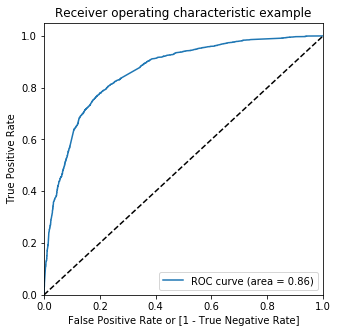

In [99]:
# Call the ROC function and Plotting the ROC Curve
# ------------------------------------------------
draw_roc(y_train_pred_final.Converted, 
         y_train_pred_final.Conversion_Prob)

**************
**The area under the curve comes out to be 0.86 which is considered a very good value**
**********

********************
##  <font color='blue'> Step 8 - Finding the Optimal Probability Cut-Offs
********************

In [100]:
# -----------------------------------------------------------------------
# -------- Optimal Probability cut-off is that probabiliy value, --------
# -------- where we get balanced Sensitivity & Specificity.       --------
# -----------------------------------------------------------------------

# Creating columns with different Probability cut-offs
# ====================================================
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.21,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.02,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.56,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.87,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.91,7987,1,1,1,1,1,1,1,1,1,1,1


In [101]:
# Calculating Accuracy, Specificity and Sensitivity for various Probability cut-off values
# ========================================================================================
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity_val = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity_val = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity_val,specificity_val]
cutoff_df

,prob,accuracy,sensi,speci
0.00,0.00,0.39,1.00,0.00
0.10,0.10,0.57,0.98,0.32
0.20,0.20,0.71,0.92,0.58
0.30,0.30,0.77,0.83,0.74
0.40,0.40,0.80,0.75,0.83
0.50,0.50,0.80,0.67,0.88
0.60,0.60,0.77,0.54,0.91
0.70,0.70,0.75,0.45,0.94
0.80,0.80,0.73,0.34,0.97
0.90,0.90,0.67,0.17,0.99


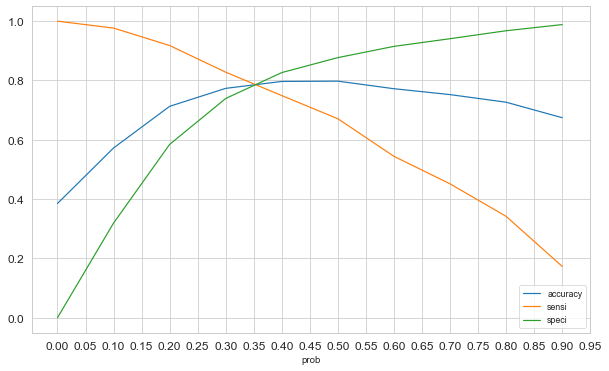

In [102]:
# Plotting these values of Accuracy, Specificity and Sensitivity for various probabilities
# Intersection of these 3 lines will give us a cut-off value
# ---------------------------------------------------------------------------------------------------------

sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

***********
**From the above curve we find that the optimum point to be taken as a cut-off for the probability values is - 0.35.**
**********

In [103]:

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.21,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.02,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.56,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.87,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.91,7987,1,1,1,1,1,1,1,1,1,1,1,1


#### Confusion Matrix

In [104]:
# Creating confusion matrix 
# -------------------------
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3011,  894],
       [ 479, 1967]], dtype=int64)

**************
We find the Confusion Matrix as -  <br><br>

| Predicted Values >>> | Lead Not Converted | Lead Converted | 
| :- | :---- | :---- | 
| **Actual Values** | -- | -- |
| **Lead Not Converted** | TN = 3011 | FP = 894 |
| **Lead Converted** | FN =  479 | TP = 1967 |

********************

In [105]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

#### Accuracy

In [106]:
# Let's check the overall accuracy.
accuracy1 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print('Accuracy of Model after optimized cut-off is : ',accuracy1)

Accuracy of Model after optimized cut-off is :  0.7838135726657219


#### Sensitivity

In [107]:
senstivity1 = TP / float(TP+FN)
print(senstivity1)

0.804170073589534


#### Specificity / Recall

In [108]:
specificity1 = TN / float(TN+FP)
print(specificity1)

0.7710627400768246


#### Precision

In [109]:
precision1 = TP/float(TP+FP)
print("Precision of the Model after deciding cut-off : ", precision1)

Precision of the Model after deciding cut-off :  0.6875218455085634


#### Precision-Recall Tradeoff

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, 
                                          y_train_pred_final.Conversion_Prob)

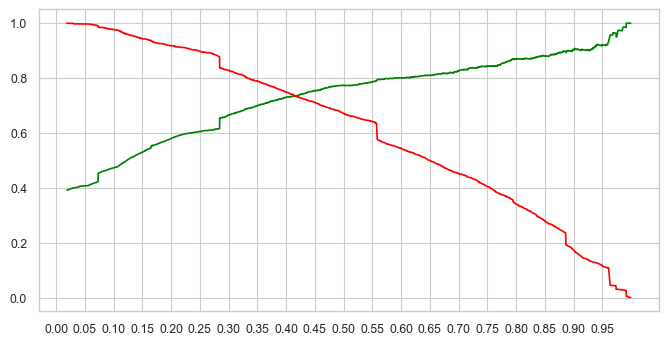

In [111]:
# Plotting the Precision-Recall Curve
# -----------------------------------
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

**************
**From the above curve we observe that the precision-recall curve gives us a cut-off of 0.42, but we already fulfilled our business requirement of lead conversion-rate of about 80%**
**************

#### F1-Score

In [112]:
f1_score = 2*(precision1*specificity1)/(precision1+specificity1)
print('F1 Score : ', f1_score)

F1 Score :  0.7268998771816158


********************
##  <font color='blue'> Step 9 - Making Predictions on the Test Set
********************

In [113]:
# Scaling Continuous Variables
# ----------------------------
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

In [114]:
# Since the Test and Train X datasets should have the same column
# Thus we will substitute all the columns of X_train to X_test
# ----------------------------------------------------------------------
col = X_train.columns
X_test = X_test[col]

In [115]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Lead Origin_Lead Import,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_SMS Sent
3271,0,-0.60,0,0,0,0,1,0,0,0
1490,0,1.89,0,0,0,0,1,0,0,0
7936,0,-0.75,0,0,0,0,1,0,0,0
4216,0,-0.89,0,1,0,0,1,0,0,0
3830,0,-0.59,0,0,0,0,1,0,0,0


************
### <font color = 'magenta'> 9.1) - Making prediction

In [116]:
# Adding constant to the X_test dataframe
# ---------------------------------------
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Lead Origin_Lead Import,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_SMS Sent
3271,1.00,0,-0.60,0,0,0,0,1,0,0,0
1490,1.00,0,1.89,0,0,0,0,1,0,0,0
7936,1.00,0,-0.75,0,0,0,0,1,0,0,0
4216,1.00,0,-0.89,0,1,0,0,1,0,0,0
3830,1.00,0,-0.59,0,0,0,0,1,0,0,0


In [117]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = log_model_6.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)


# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,3271,0.14
1,1,1490,0.74
2,0,7936,0.12
3,1,4216,0.89
4,0,3830,0.14


In [118]:
# Making prediction using cut off 0.35
# ------------------------------------------
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [119]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,3271,0.14,0
1,1,1490,0.74,1
2,0,7936,0.12,0
3,1,4216,0.89,1
4,0,3830,0.14,0


***************
### <font color = 'magenta'> 9.2) Making the Confusion Matrix

In [120]:
# Creating confusion matrix 
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_test

array([[1361,  373],
       [ 230,  759]], dtype=int64)

**************
We find the Confusion Matrix for the Test Dataset as -  <br><br>

| Predicted Values >>> | Lead Not Converted | Lead Converted | 
| :- | :---- | :---- | 
| **Actual Values** | -- | -- |
| **Lead Not Converted** | TN = 1361 | FP = 373 |
| **Lead Converted** | FN =  230 | TP = 759 |

********************

In [121]:
# Substituting the value of true positive
TP = confusion_test[1,1]
# Substituting the value of true negatives
TN = confusion_test[0,0]
# Substituting the value of false positives
FP = confusion_test[0,1] 
# Substituting the value of false negatives
FN = confusion_test[1,0]

#### Accuracy

In [122]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], 
                       y_pred_final.final_predicted)

0.7785530664708042

#### Sensitivity

In [123]:
print("Sensitivity of the Final Model - ",TP/(TP+FN))

Sensitivity of the Final Model -  0.7674418604651163


#### Specificity

In [124]:
print('Specificity of the Final Model - ',(TN/(TN+FP)))

Specificity of the Final Model -  0.7848904267589388


#### Precision

In [125]:
print("Precision for the Final Model - ",confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))

Precision for the Final Model -  0.6704946996466431


#### Recall

In [126]:
print("Precision for the Final Model - ",confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))

Precision for the Final Model -  0.7674418604651163


#### Plotting the ROC Curve

In [127]:
# ROC function
# ------------
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
# Making use of the ROC_curve function
# ------------------------------------
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, 
                                         y_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

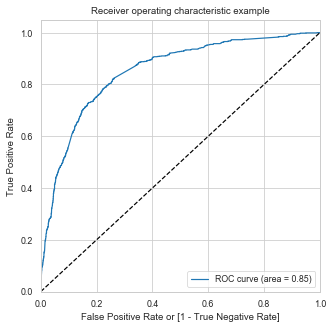

In [129]:
# Call the ROC function and Plotting the ROC Curve
# ------------------------------------------------
draw_roc(y_pred_final.Converted, 
         y_pred_final.Conversion_Prob)

***As a rule of thumb, an AUC can be classed as follows,***

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail
 
***Since we got a value of 0.85, our model seems to be doing well on the test dataset.***

********************
##  <font color='blue'> Step 10 - Calculating Lead Score for the Entire Dataset
********************

### Lead Score = Conversion Probability * 100
**************

In [130]:
# Selecting the test dataset along with the Conversion Probability and 
#    final predicted value for 'Converted' variable
# ----------------------------------------------------------------------
leadscoring_test_pred = y_pred_final.copy()
leadscoring_test_pred.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,3271,0.14,0
1,1,1490,0.74,1
2,0,7936,0.12,0
3,1,4216,0.89,1
4,0,3830,0.14,0


In [131]:
# Selecting the train dataset along with the Conversion Probability and 
#     final predicted value for 'Converted' variables
# -----------------------------------------------------------------------
leadscoring_train_pred = y_train_pred_final.copy()
leadscoring_train_pred.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.21,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.02,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.56,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.87,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.91,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [132]:
# Removing uwanted columns from leadscoring_train_pred
leadscoring_train_pred = leadscoring_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leadscoring_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3009,0,0.21,0
1,1012,0,0.02,0
2,9226,0,0.56,1
3,4750,1,0.87,1
4,7987,1,0.91,1


In [133]:
leadscoring_final_df = pd.concat([leadscoring_train_pred, leadscoring_test_pred])
leadscoring_final_df.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3009,0,0.21,0
1,1012,0,0.02,0
2,9226,0,0.56,1
3,4750,1,0.87,1
4,7987,1,0.91,1


In [134]:
# Re-setting the index to 'LeadID' and then sorting the dataframe in ascending order of LeadID
# --------------------------------------------------------------------------------------------
leadscoring_final_df= leadscoring_final_df.set_index('LeadID').sort_index(axis = 0, ascending = True)
leadscoring_final_df.head()

,Converted,Conversion_Prob,final_predicted
LeadID,,,
0,0,0.16,0
1,0,0.33,0
2,1,0.75,1
3,0,0.36,1
4,1,0.54,1


In [135]:
# Adding the Lead_Score column to the final dataframe
# ---------------------------------------------------
leadscoring_final_df['Lead_Score'] = leadscoring_final_df['Conversion_Prob'].apply(lambda x: round(x*100))
leadscoring_final_df.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.16,0,16
1,0,0.33,0,33
2,1,0.75,1,75
3,0,0.36,1,36
4,1,0.54,1,54


In [136]:
leadscoring_final_df.shape

(9074, 4)

In [137]:
# ---------------------------------------------------
# We see that the entire dataframe has been combined.
# ---------------------------------------------------

********************
##  <font color='blue'> Step 11 - Choosing the Best Features that impacts our predictions
********************

In [138]:
# Selecting the coefficients of the selected features 
#   from our final model excluding the intercept
# --------------------------------------------------------

features_list = log_model_6.params[1:]
features_list

Do Not Email                            -1.58
Total Time Spent on Website              1.15
Lead Source_Olark Chat                   1.21
Lead Source_Reference                    4.19
Lead Source_Welingak Website             5.76
Lead Origin_Lead Import                  1.41
Last Activity_Email Opened               0.70
Last Activity_Olark Chat Conversation   -0.92
Last Activity_Other Activities           1.59
Last Activity_SMS Sent                   1.85
dtype: float64

*****************
#### From the above data we can see that the top features which contribute most towards the probability of lead getting converted are:


<font color='red'> **The conversion probability of a lead increases with increase in values of the following features in descending order:**</font>

- Lead Source_Welingak Website
- Lead Source_Reference
- Last Activity_SMS Sent
- Last Activity_Other Activities
- Lead Origin_Lead Import
- Lead Source_Olark Chat
- Total Time Spent on Website
- Last Activity_Email Opened

<font color='red'> **The conversion probability of a lead increases with decrease in values of the following features in descending order:**</font>
- Do Not Email
- Last Activity_Olark Chat Conversion
***********

********************
##  <font color='blue'> Step 12 - Conclusion
********************

The model we made using the logistic regression can be considered a good model. It has the following characteristics - 

- All the features/variables have a P-value of less than 0.05.<br><br>
- The VIF scores for all the variables are very low and are less than 5, thus there is hardly any multi-collinearity between the variables.<br><br>
- The overall accuracy of the model is around 78%, with a threshold probaility of 0.5.<br><br>
- Thus the accuracy is very acceptable.<br><br>
- Also the specificity of the model is around 78.5% which is also acceptable.<br><br>
- The sensitivity/recall of the model is around 76% which is also acceptable.<br><br>
- The precision of the model is about 68% which could be considered decent.
- Also, when we plotted the ROC curve, the area under the curve we got was aroung 86%, which could be considered good.<br><br>
<br><br>
- **Overall this model meets our business requirement, where we can say we got a lead conversion rate of nearly 80%**

<br><br>
Apart from the model there were some variable which greatly influenced our model.<br>
The top 3 variables which influenced our model in a positive way are - <br>
- 1 - Lead Source - Welingak Website
- 2 - Lead Source - Reference
- 3 - Last Activity - SMS Sent

The top 2 variables which influenced our model in a negative way are - <br>
- 1 - Do Not Email
- 2 - Last Activity - Olark Chat Conversion


**************************